# 事前準備

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_dataset = pd.read_csv('train.csv').copy()
test_dataset = pd.read_csv('test.csv').copy()
target = train_dataset['y'].copy()
train_dataset_drop_y = train_dataset.drop('y', axis=1).copy()
train_id = train_dataset['id']
test_id = test_dataset['id']

In [3]:
target.head()

0    138.0
1     42.0
2     65.0
3    166.0
4    165.0
Name: y, dtype: float64

In [4]:
train_dataset_drop_y, test_dataset = train_dataset_drop_y.align(test_dataset, join='inner', axis=1)

In [5]:
train_dataset_drop_y.shape, test_dataset.shape, target.shape

((55583, 28), (18528, 28), (55583,))

In [6]:
train_dataset_drop_y['training_set'] = True
test_dataset['training_set'] = False

In [7]:
full_dataset = pd.concat([train_dataset_drop_y, test_dataset], axis=0).copy()
full_dataset.shape

(74111, 29)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
full_dataset = full_dataset.drop('id', axis=1)# IDは特徴量ではないので除外
full_dataset.dtypes.value_counts()

object     19
float64     6
int64       2
bool        1
dtype: int64

In [9]:
# 2値のオブジェクトをダミー変数化
le_count = 0

for col in full_dataset:
    if full_dataset[col].dtype == 'object':
         if len(list(full_dataset[col].unique())) <= 2: # 2個以上でそれやると何が何だかわからなくなるため２個まで
            le.fit(full_dataset[col])
            full_dataset[col] = le.transform(full_dataset[col])
            
            le_count += 1
print('%d columns were label encoded.' % le_count) 

2 columns were label encoded.


In [10]:
# 2値のオブジェクトをダミー変数化
le_count = 0

for col in train_dataset:
    if train_dataset[col].dtype == 'object':
         if len(list(train_dataset[col].unique())) <= 2: # 2個以上でそれやると何が何だかわからなくなるため２個まで
            le.fit(train_dataset[col])
            train_dataset[col] = le.transform(train_dataset[col])
            
            le_count += 1
print('%d columns were label encoded.' % le_count) 

2 columns were label encoded.


In [11]:
pd.set_option('display.max_columns', 50)
full_dataset.head()

,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,training_set
0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,1,My place is meant for family and a few friends...,2016-07-27,t,f,NaN,2016-07-13,0,2016-07-27,33.788931,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804,True
1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,1,This is a new listing for a lovely guest bedro...,2016-09-12,t,t,100%,2015-12-30,0,2017-03-31,38.934810,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,True
2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,1,We're looking forward to your stay at our apt....,2016-06-15,t,f,100%,2016-05-21,1,2017-08-13,40.695118,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,True
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,1,BEST CITY VIEWS - - ROOF DECK W/ BBQ & WiFi - ...,2014-03-15,t,t,100%,2012-06-19,1,2017-09-03,37.796728,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,True
4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,1,Charming Apartment on the upper west side of M...,2015-08-05,t,t,100%,2015-03-25,0,2017-09-10,40.785050,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,True


# 欠損値

In [12]:
full_dataset.isnull().sum()

accommodates                  0
amenities                     0
bathrooms                   200
bed_type                      0
bedrooms                     91
beds                        131
cancellation_policy           0
city                          0
cleaning_fee                  0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
property_type                 0
review_scores_rating      16722
room_type                     0
thumbnail_url              8216
zipcode                     966
training_set                  0
dtype: int64

## bathrooms

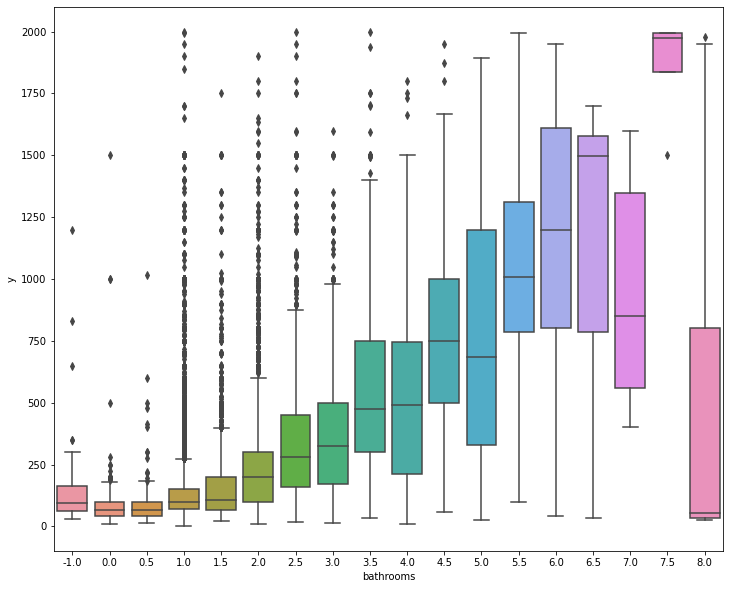

In [13]:
#まず欠損値に-1を代入
train_dataset['bathrooms'].fillna(-1, inplace=True)
full_dataset['bathrooms'].fillna(-1, inplace=True)
#箱ひげ図で統計量の近い値の確認
plt.subplots(figsize = (12,10))
sns.boxplot(x='bathrooms', y='y', data=train_dataset)
plt.show();

In [14]:
# 欠損値のy詳細
display(train_dataset[train_dataset['bathrooms']== -1]['y'].describe())
display(train_dataset[train_dataset['bathrooms']== 1]['y'].describe())

count     147.000000
mean      135.353741
std       136.872343
min        29.000000
25%        62.500000
50%        95.000000
75%       162.000000
max      1200.000000
Name: y, dtype: float64

count    43469.000000
mean       130.685224
std        108.769087
min          1.000000
25%         70.000000
50%        100.000000
75%        152.000000
max       1999.000000
Name: y, dtype: float64

In [15]:
full_dataset['bathrooms'] = full_dataset['bathrooms'].replace(-1, 1)
train_dataset['bathrooms'] = train_dataset['bathrooms'].replace(-1, 1)

## bedrooms

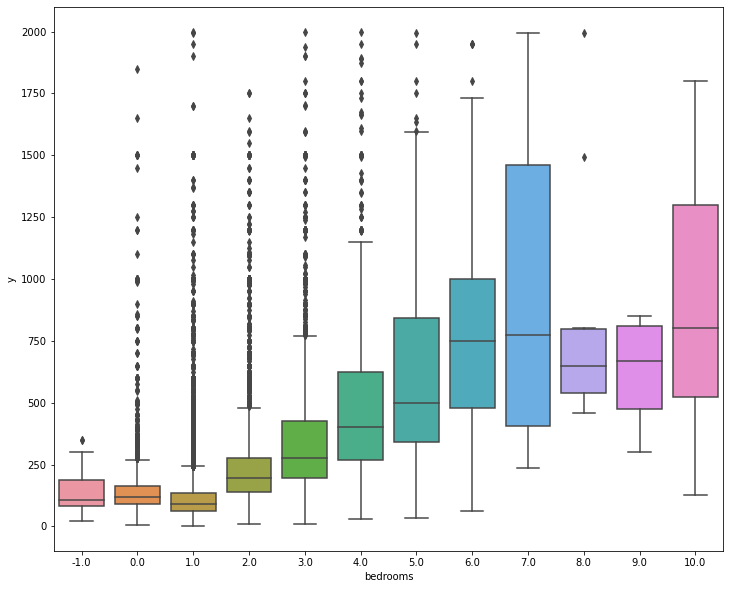

In [16]:
#まず欠損値に-1を代入
train_dataset['bedrooms'].fillna(-1, inplace=True)
full_dataset['bedrooms'].fillna(-1, inplace=True)
#箱ひげ図で統計量の近い値の確認
plt.subplots(figsize = (12,10))
sns.boxplot(x='bedrooms', y='y', data=train_dataset)
plt.show();

In [17]:
train_dataset[train_dataset['bedrooms']== -1]['y'].describe()

count     71.000000
mean     133.014085
std       69.906978
min       20.000000
25%       83.000000
50%      105.000000
75%      187.000000
max      349.000000
Name: y, dtype: float64

In [18]:
train_dataset[train_dataset['bedrooms']== 0]['y'].describe()

count    5016.000000
mean      144.171651
std       112.832753
min         5.000000
25%        90.000000
50%       120.000000
75%       162.250000
max      1850.000000
Name: y, dtype: float64

In [19]:
train_dataset[train_dataset['bedrooms']== 1]['y'].describe()

count    37338.000000
mean       114.371204
std         99.751734
min          1.000000
25%         62.000000
50%         90.000000
75%        135.000000
max       1999.000000
Name: y, dtype: float64

In [20]:
full_dataset['bedrooms'] = full_dataset['bedrooms'].replace(-1, 0)
train_dataset['bedrooms'] = train_dataset['bedrooms'].replace(-1, 0)

## beds

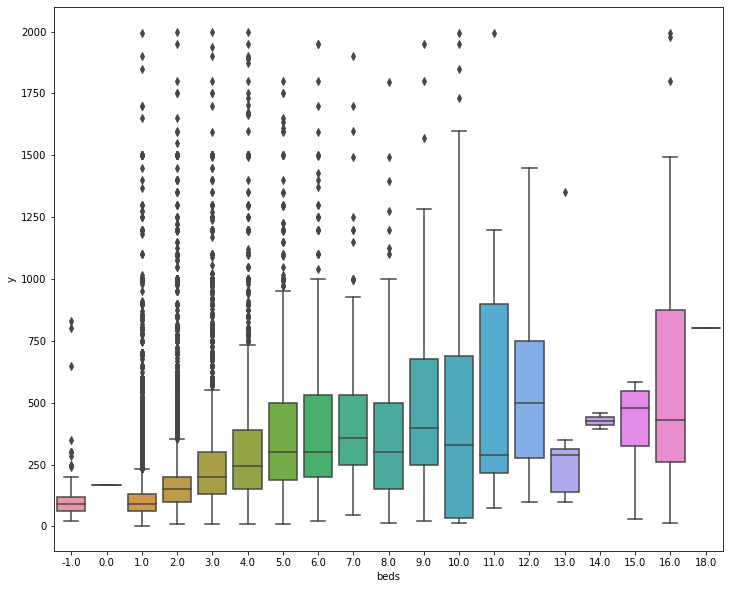

In [21]:
#まず欠損値に-1を代入
train_dataset['beds'].fillna(-1, inplace=True)
full_dataset['beds'].fillna(-1, inplace=True)
#箱ひげ図で統計量の近い値の確認
plt.subplots(figsize = (12,10))
sns.boxplot(x='beds', y='y', data=train_dataset)
plt.show();

In [22]:
full_dataset['bedrooms'] = full_dataset['bedrooms'].replace(-1, 1)
train_dataset['bedrooms'] = train_dataset['bedrooms'].replace(-1, 1)

## first_review　☆

In [23]:
# isnullは欠損してる場合Trueを返すので、その否定
exits_reviews = train_dataset[~train_dataset['first_review'].isnull()]
no_reviews = train_dataset[train_dataset['first_review'].isnull()]

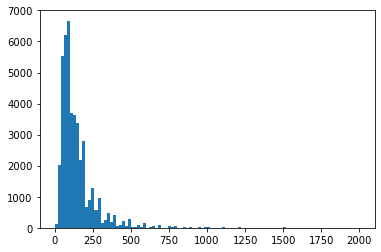

In [24]:
plt.hist(exits_reviews['y'], bins=100);

In [25]:
exits_reviews['y'].describe()

count    43675.000000
mean       147.564419
std        134.369984
min          1.000000
25%         73.000000
50%        110.000000
75%        175.000000
max       1999.000000
Name: y, dtype: float64

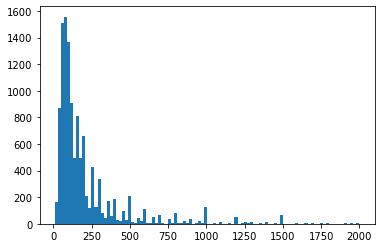

In [26]:
plt.hist(no_reviews['y'], bins=100);

In [27]:
no_reviews['y'].describe()

count    11908.000000
mean       206.373866
std        250.885084
min         10.000000
25%         75.000000
50%        120.000000
75%        220.000000
max       1999.000000
Name: y, dtype: float64

レビューが欠損してる事は宿泊料金と直接関わりはない。  
とりあえず、記入されているものを1,記入されていないものを0とカテゴリーすることにする。  
日付のデータが入っているのでsplitあたりで取り出して、年代ごとにカテゴリーするのもやってみたい。

In [28]:
#first_reviewの有無で分ける
full_dataset['first_review'].fillna(0, inplace=True)

for i, d in enumerate(full_dataset['first_review']):
    if d != 0:
        full_dataset['first_review'].iloc[i] = 1

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [29]:
#first_reviewの有無で分ける
train_dataset['first_review'].fillna(0, inplace=True)

for i, d in enumerate(train_dataset['first_review']):
    if d != 0:
        train_dataset['first_review'].iloc[i] = 1

In [30]:
full_dataset['first_review'].value_counts()

1    58247
0    15864
Name: first_review, dtype: int64

## host_has_profile_pic

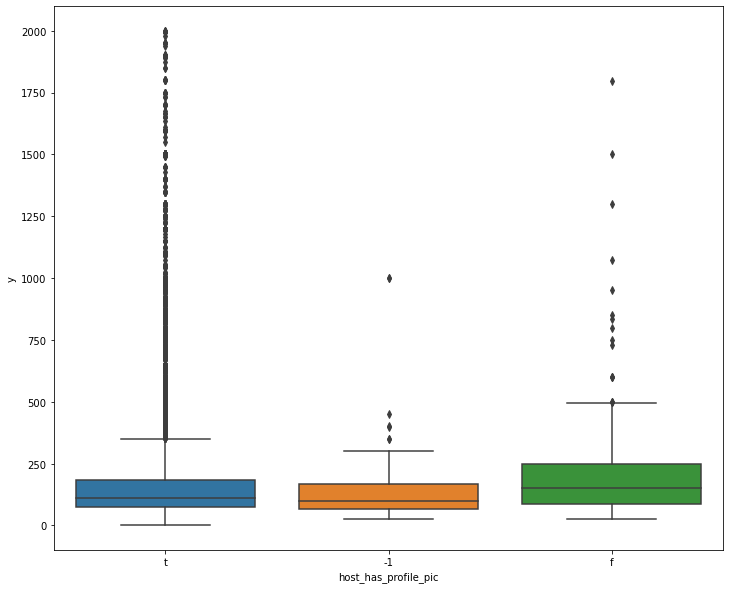

In [31]:
#まず欠損値に-1を代入
full_dataset['host_has_profile_pic'].fillna(-1, inplace=True)
train_dataset['host_has_profile_pic'].fillna(-1, inplace=True)
#箱ひげ図で統計量の近い値の確認
plt.subplots(figsize = (12,10))
sns.boxplot(x='host_has_profile_pic', y='y', data=train_dataset)
plt.show();

In [32]:
full_dataset['host_has_profile_pic'].value_counts()

t     73697
f       226
-1      188
Name: host_has_profile_pic, dtype: int64

In [33]:
train_dataset[train_dataset['host_has_profile_pic']=='t']['y'].describe()

count    55265.000000
mean       160.028517
std        167.803733
min          1.000000
25%         74.000000
50%        110.000000
75%        185.000000
max       1999.000000
Name: y, dtype: float64

In [34]:
train_dataset[train_dataset['host_has_profile_pic']=='f']['y'].describe()

count     170.000000
mean      223.235294
std       255.706986
min        25.000000
25%        86.000000
50%       149.500000
75%       249.750000
max      1795.000000
Name: y, dtype: float64

0.3%ほどしか写真がない施設はなく大多数は写真がある。  
平均等はない方が高く見える。　　
分布的にtに入れる。

In [35]:
full_dataset['host_has_profile_pic'] = full_dataset['host_has_profile_pic'].apply(lambda x: 0 if x == 'f' else 1)

In [36]:
train_dataset['host_has_profile_pic'] = train_dataset['host_has_profile_pic'].apply(lambda x: 0 if x == 'f' else 1)

In [37]:
full_dataset['host_has_profile_pic'].value_counts()

1    73885
0      226
Name: host_has_profile_pic, dtype: int64

## host_identity_verified 

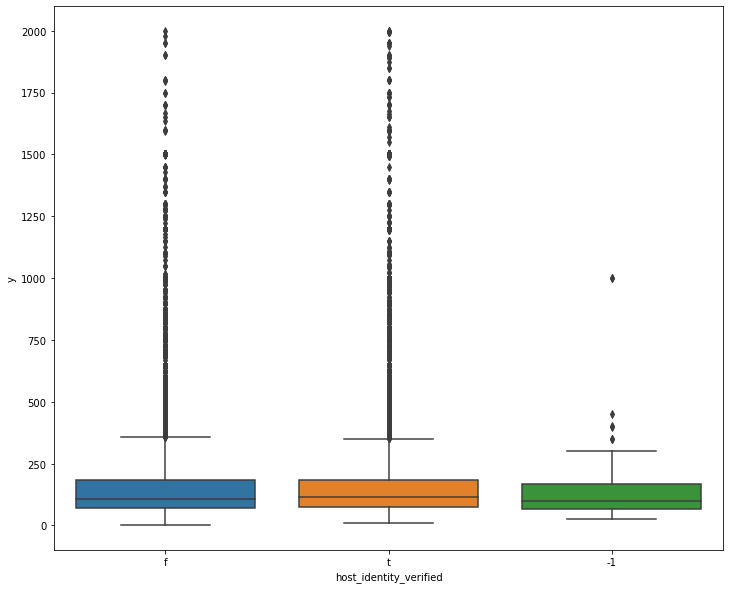

In [38]:
full_dataset['host_identity_verified'].fillna(-1, inplace=True)
train_dataset['host_identity_verified'].fillna(-1, inplace=True)
plt.subplots(figsize = (12,10))
sns.boxplot(x='host_identity_verified', y='y', data=train_dataset)
plt.show();

In [39]:
train_dataset[train_dataset['host_identity_verified']=='t']['y'].describe()

count    37264.000000
mean       159.091831
std        160.072666
min         10.000000
25%         75.000000
50%        115.000000
75%        185.000000
max       1999.000000
Name: y, dtype: float64

In [40]:
train_dataset[train_dataset['host_identity_verified']=='f']['y'].describe()

count    18171.000000
mean       162.540752
std        183.662878
min          1.000000
25%         69.000000
50%        105.000000
75%        185.000000
max       1999.000000
Name: y, dtype: float64

In [41]:
train_dataset[train_dataset['host_identity_verified']== -1]['y'].describe()

count     148.000000
mean      138.175676
std       129.000802
min        28.000000
25%        67.250000
50%       100.000000
75%       169.250000
max      1000.000000
Name: y, dtype: float64

とくに　目立った何かはなさそうに見えるので大多数の方へ格納

In [42]:
full_dataset['host_identity_verified'] = full_dataset['host_identity_verified'].apply(lambda x: 0 if x == 'f' else 1)

In [43]:
train_dataset['host_identity_verified'] = train_dataset['host_identity_verified'].apply(lambda x: 0 if x == 'f' else 1)

## (host_response_rate)　☆

列にうっとうしく％表記があるため取り除く

In [44]:
train_dataset['host_response_rate'] = train_dataset['host_response_rate'].str.replace('%', '')
full_dataset['host_response_rate'] = full_dataset['host_response_rate'].str.replace('%', '')

# floatに変換
train_dataset['host_response_rate'] = train_dataset['host_response_rate'].astype('float')
full_dataset['host_response_rate'] = full_dataset['host_response_rate'].astype('float')

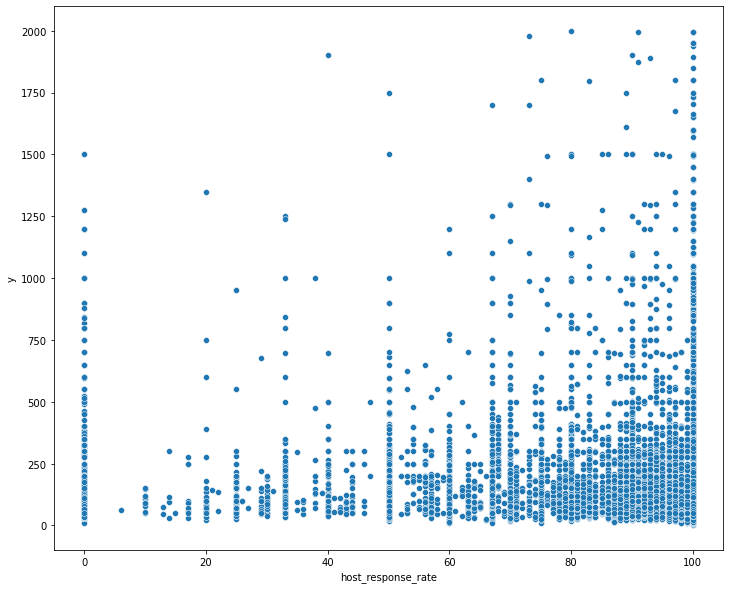

In [45]:
plt.subplots(figsize = (12,10))
sns.scatterplot(x='host_response_rate', y='y', data=train_dataset)
plt.show();

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='host_response_rate', ylabel='Density'>

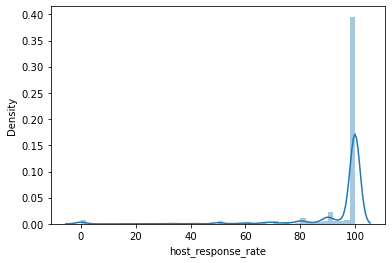

In [46]:
sns.distplot(full_dataset['host_response_rate'])

In [47]:
full_dataset['host_response_rate'].describe()

count    55812.000000
mean        94.351967
std         16.341817
min          0.000000
25%        100.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: host_response_rate, dtype: float64

ほぼほぼ100に見える。最頻値の100で置換する。  
平均の方がいい可能性も若干ある。

In [48]:
median_val = full_dataset['host_response_rate'].median()
full_dataset['host_response_rate'] = full_dataset['host_response_rate'].fillna(median_val)

In [49]:
train_val = train_dataset['host_response_rate'].median()
train_dataset['host_response_rate'] = train_dataset['host_response_rate'].fillna(median_val)

## host_since

In [50]:
# 時系列データに変換
train_dataset['host_since'] = train_dataset['host_since'].apply(pd.to_datetime)
full_dataset['host_since'] = full_dataset['host_since'].apply(pd.to_datetime)
train_dataset['host_since_year'] = train_dataset['host_since'].dt.year
full_dataset['host_since_year'] = full_dataset['host_since'].dt.year

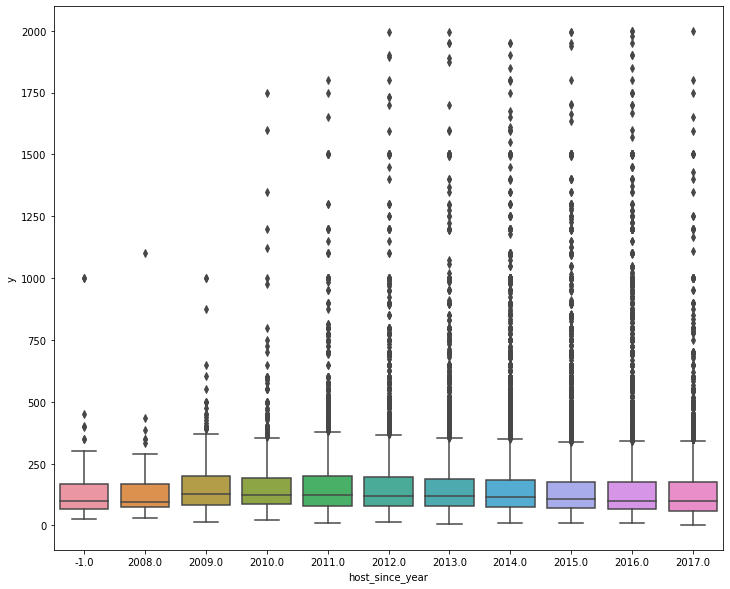

In [51]:
train_dataset['host_since_year'].fillna(-1, inplace=True)
full_dataset['host_since_year'].fillna(-1, inplace=True)
#箱ひげ図で統計量の近い値の確認
plt.subplots(figsize = (12,10))
sns.boxplot(x='host_since_year', y='y', data=train_dataset)
plt.show();

分布的には2008に近いので今回はそうする。  
おそらくカテゴリー変数化してあげないとうまくはたらかなさそう

In [52]:
full_dataset['host_since_year'] = full_dataset['host_since_year'].replace(-1, 2008.0)
train_dataset['host_since_year'] = train_dataset['host_since_year'].replace(-1, 2008.0)

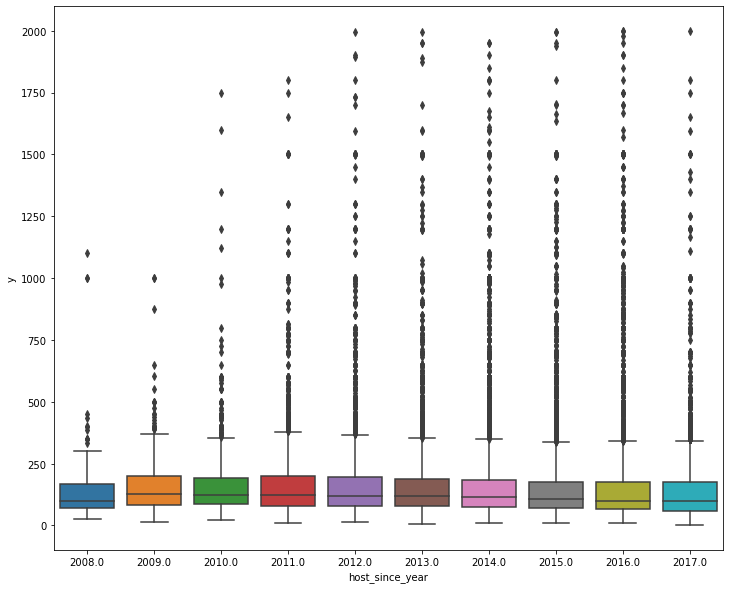

In [53]:
#箱ひげ図で統計量の近い値の確認
plt.subplots(figsize = (12,10))
sns.boxplot(x='host_since_year', y='y', data=train_dataset)
plt.show();

In [54]:
len(train_dataset['host_since_year'].unique())

10

In [55]:
train_dataset['host_since_year'].shape[0]

55583

In [56]:
# 最小値を引くことで疑似カテゴリー化
full_dataset['host_since_year'] = full_dataset['host_since_year'] - 2008

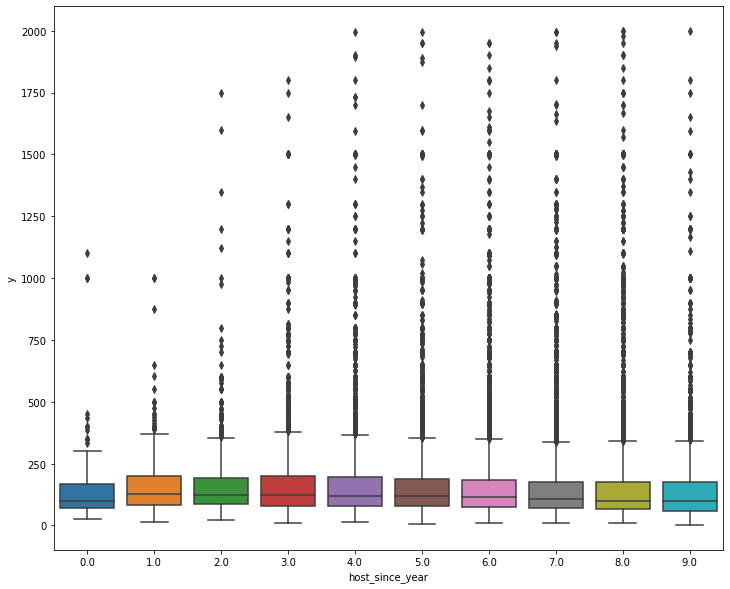

In [57]:
train_dataset['host_since_year'] = train_dataset['host_since_year'] - 2008

plt.subplots(figsize = (12,10))
sns.boxplot(x='host_since_year', y='y', data=train_dataset)
plt.show();

In [58]:
full_dataset.drop('host_since', axis=1, inplace=True)

In [59]:
train_dataset.drop('host_since', axis=1, inplace=True)

## last_review ☆

In [60]:
train_dataset['last_review'] = train_dataset['last_review'].apply(pd.to_datetime)
full_dataset['last_review'] = full_dataset['last_review'].apply(pd.to_datetime)
train_dataset['last_review_year'] = train_dataset['last_review'].dt.year
full_dataset['last_review_year'] = full_dataset['last_review'].dt.year

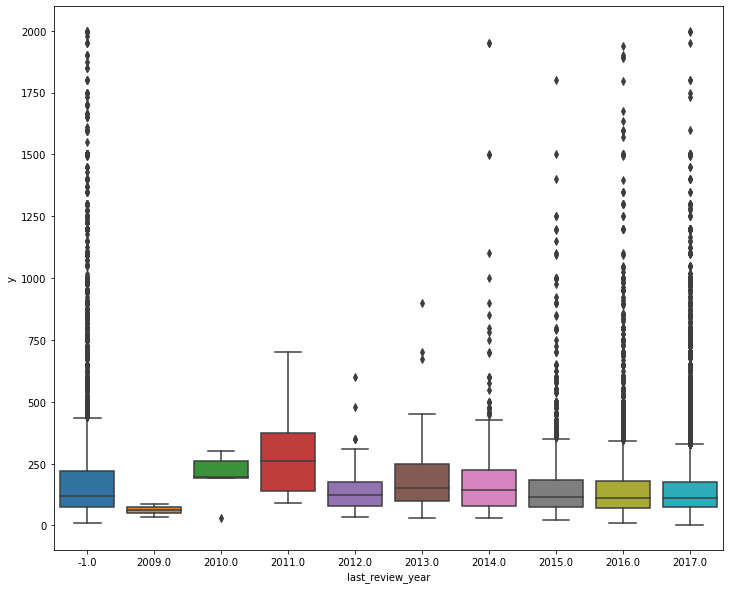

In [61]:
train_dataset['last_review_year'].fillna(-1, inplace=True)
full_dataset['last_review_year'].fillna(-1, inplace=True)
#箱ひげ図で統計量の近い値の確認
plt.subplots(figsize = (12,10))
sns.boxplot(x='last_review_year', y='y', data=train_dataset)
plt.show();

In [62]:
train_dataset[train_dataset['last_review_year']==-1]['y'].describe()

count    11880.000000
mean       206.546886
std        251.115600
min         10.000000
25%         75.000000
50%        120.000000
75%        220.000000
max       1999.000000
Name: y, dtype: float64

In [63]:
train_dataset[train_dataset['last_review_year']==2014]['y'].describe()

count     353.000000
mean      200.152975
std       227.469352
min        30.000000
25%        80.000000
50%       145.000000
75%       225.000000
max      1950.000000
Name: y, dtype: float64

In [64]:
train_dataset[train_dataset['last_review_year']==2015]['y'].describe()

count    2203.000000
mean      157.040399
std       148.766294
min        20.000000
25%        75.000000
50%       115.000000
75%       185.000000
max      1800.000000
Name: y, dtype: float64

この場合はどちらに割り振るのが大事なのだろうか...  
二択だけど平均値で2014にしておく。

In [65]:
full_dataset['last_review_year'] = full_dataset['last_review_year'].replace(-1, 2014.0)
train_dataset['last_review_year'] = train_dataset['last_review_year'].replace(-1, 2014.0)

# 最小値を引くことで疑似カテゴリー化
full_dataset['last_review_year'] = full_dataset['last_review_year'] - 2009
train_dataset['last_review_year'] = train_dataset['last_review_year'] - 2009

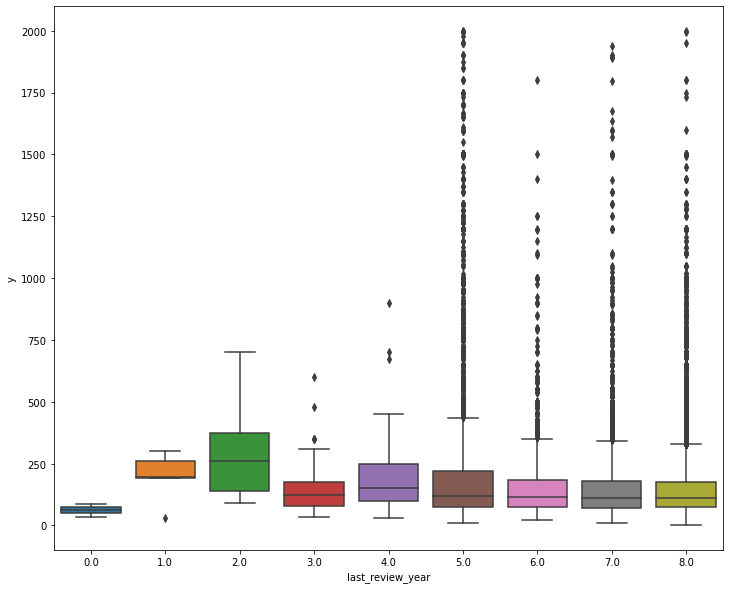

In [66]:
#箱ひげ図で統計量の近い値の確認
plt.subplots(figsize = (12,10))
sns.boxplot(x='last_review_year', y='y', data=train_dataset)
plt.show();

In [67]:
full_dataset.drop('last_review', axis=1, inplace=True)
train_dataset.drop('last_review', axis=1, inplace=True)

## neighbourhood ☆☆

In [68]:
len(full_dataset['neighbourhood'].unique())

620

In [69]:
full_dataset['neighbourhood'].value_counts().sort_values(ascending=False)

Williamsburg                2862
Bedford-Stuyvesant          2166
Bushwick                    1601
Upper West Side             1396
Mid-Wilshire                1392
                            ... 
Pullman                        1
Suitland-Silver Hill, MD       1
Magnificent Mile               1
Todt Hill                      1
Vernon                         1
Name: neighbourhood, Length: 619, dtype: int64

欠損が6800(9%程),最大でも2862しかとっていない。そのためNONEっていう特徴になりそうで怖い。  
種類が620あるのであんまりラベリングはしたくないけど、、、、  
感覚的には上位5個のグラフをみて、分布に差がなければ落として良い気もする。

In [70]:
train_dataset[train_dataset['neighbourhood']=='Williamsburg']['y'].describe()

count    2189.000000
mean      138.342622
std       103.990685
min        24.000000
25%        75.000000
50%       109.000000
75%       175.000000
max      1500.000000
Name: y, dtype: float64

In [71]:
train_dataset[train_dataset['neighbourhood']=='Bedford-Stuyvesant']['y'].describe()

count    1615.000000
mean      101.388235
std        90.941787
min        10.000000
25%        55.000000
50%        75.000000
75%       120.000000
max      1350.000000
Name: y, dtype: float64

In [72]:
train_dataset[train_dataset['neighbourhood']=='Bushwick']['y'].describe()

count    1208.000000
mean       82.745033
std        62.155853
min        10.000000
25%        50.000000
50%        65.000000
75%        95.000000
max      1000.000000
Name: y, dtype: float64

In [73]:
train_dataset[train_dataset['neighbourhood']=='Upper West Side']['y'].describe()

count    1075.000000
mean      183.341395
std       157.531126
min         5.000000
25%        99.000000
50%       150.000000
75%       200.000000
max      1500.000000
Name: y, dtype: float64

In [74]:
train_dataset[train_dataset['neighbourhood']=='Mid-Wilshire']['y'].describe()

count    1058.000000
mean      138.277883
std       153.267361
min        20.000000
25%        70.000000
50%       100.000000
75%       150.000000
max      1889.000000
Name: y, dtype: float64

かなり、地域によって目的変数は変わってくる印象を受ける。9%を全部落とすのはナンセンスなのでNoneで埋めることにする。  
落としてみてもやってみる。

In [75]:
full_dataset['neighbourhood'] = full_dataset['neighbourhood'].fillna('None')
full_dataset['neighbourhood'].isnull().sum()

0

In [76]:
train_dataset['neighbourhood'] = train_dataset['neighbourhood'].fillna('None')
train_dataset['neighbourhood'].isnull().sum()

0

## review_scores_rating ☆

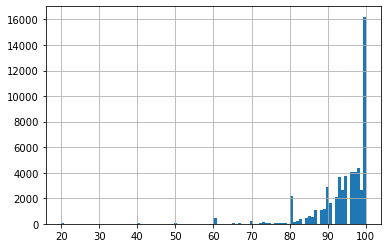

In [77]:
full_dataset['review_scores_rating'].hist(bins=100);

In [78]:
full_dataset['review_scores_rating'].describe()

count    57389.000000
mean        94.067365
std          7.836556
min         20.000000
25%         92.000000
50%         96.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

In [79]:
full_dataset['review_scores_rating'].isnull().sum()

16722

最頻値か平均か問題  
とりあえず、最頻値で補う

In [80]:
full_dataset['review_scores_rating'] = full_dataset['review_scores_rating'].fillna(100)

In [81]:
train_dataset['review_scores_rating'] = train_dataset['review_scores_rating'].fillna(100)

In [82]:
full_dataset['review_scores_rating'].describe()

count    74111.000000
mean        95.405972
std          7.328337
min         20.000000
25%         93.000000
50%         98.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

## thumbnail_url

In [83]:
# isnullは欠損してる場合Trueを返すので、その否定
exits_urls = train_dataset[~train_dataset['thumbnail_url'].isnull()]
no_urls = train_dataset[train_dataset['thumbnail_url'].isnull()]

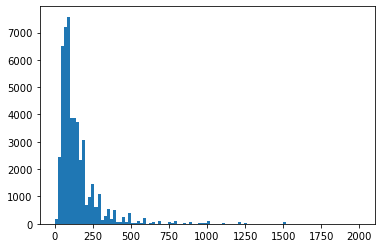

In [84]:
plt.hist(exits_urls['y'], bins=100);

In [85]:
exits_urls['y'].describe()

count    49438.000000
mean       153.021805
std        156.069887
min          1.000000
25%         70.000000
50%        109.000000
75%        177.000000
max       1999.000000
Name: y, dtype: float64

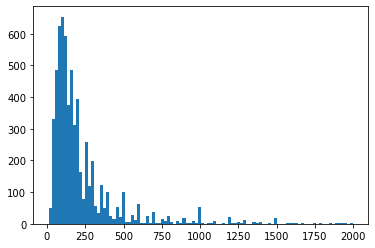

In [86]:
plt.hist(no_urls['y'], bins=100);

In [87]:
no_urls['y'].describe()

count    6145.000000
mean      217.621481
std       236.410736
min        10.000000
25%        90.000000
50%       149.000000
75%       250.000000
max      1999.000000
Name: y, dtype: float64

urlがないと宿泊料金が高い？  
あまりイメージはできないが...　疑似相関か、たまたまか  
URLに意味はないので、有無で分別

In [88]:
#first_reviewの有無で分ける
full_dataset['thumbnail_url'].fillna(0, inplace=True)

for i, d in enumerate(full_dataset['thumbnail_url']):
    if d != 0:
        full_dataset['thumbnail_url'].iloc[i] = 1

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [89]:
#first_reviewの有無で分ける
train_dataset['thumbnail_url'].fillna(0, inplace=True)

for i, d in enumerate(train_dataset['thumbnail_url']):
    if d != 0:
        train_dataset['thumbnail_url'].iloc[i] = 1

In [90]:
full_dataset['thumbnail_url'].value_counts()

1    65895
0     8216
Name: thumbnail_url, dtype: int64

## zipcode

In [91]:
# isnullは欠損してる場合Trueを返すので、その否定
exits_zipcode = train_dataset[~train_dataset['zipcode'].isnull()]
no_zipcode = train_dataset[train_dataset['zipcode'].isnull()]

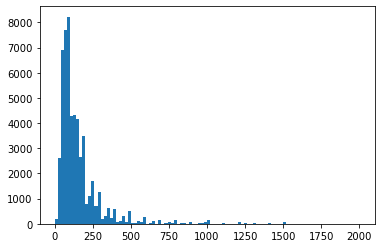

In [92]:
plt.hist(exits_zipcode['y'], bins=100);

In [93]:
exits_zipcode['y'].describe()

count    54867.000000
mean       159.922121
std        167.392588
min          1.000000
25%         74.000000
50%        110.000000
75%        185.000000
max       1999.000000
Name: y, dtype: float64

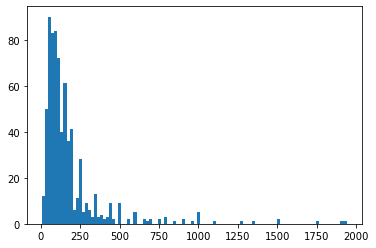

In [94]:
plt.hist(no_zipcode['y'], bins=100);

In [95]:
no_zipcode['y'].describe()

count     716.000000
mean      178.671788
std       214.068461
min        10.000000
25%        70.000000
50%       119.500000
75%       195.000000
max      1938.000000
Name: y, dtype: float64

In [96]:
full_dataset['zipcode'].fillna(0, inplace=True)

for i, d in enumerate(full_dataset['zipcode']):
    if d != 0:
        full_dataset['zipcode'].iloc[i] = 1

In [97]:
train_dataset['zipcode'].fillna(0, inplace=True)

for i, d in enumerate(train_dataset['zipcode']):
    if d != 0:
        train_dataset['zipcode'].iloc[i] = 1

In [98]:
full_dataset['zipcode'].value_counts()

1    73145
0      966
Name: zipcode, dtype: int64

In [99]:
full_dataset.isnull().sum(), train_dataset.isnull().sum()

(accommodates              0
 amenities                 0
 bathrooms                 0
 bed_type                  0
 bedrooms                  0
 beds                      0
 cancellation_policy       0
 city                      0
 cleaning_fee              0
 description               0
 first_review              0
 host_has_profile_pic      0
 host_identity_verified    0
 host_response_rate        0
 instant_bookable          0
 latitude                  0
 longitude                 0
 name                      0
 neighbourhood             0
 number_of_reviews         0
 property_type             0
 review_scores_rating      0
 room_type                 0
 thumbnail_url             0
 zipcode                   0
 training_set              0
 host_since_year           0
 last_review_year          0
 dtype: int64,
 id                        0
 accommodates              0
 amenities                 0
 bathrooms                 0
 bed_type                  0
 bedrooms                  0

# 相関係数

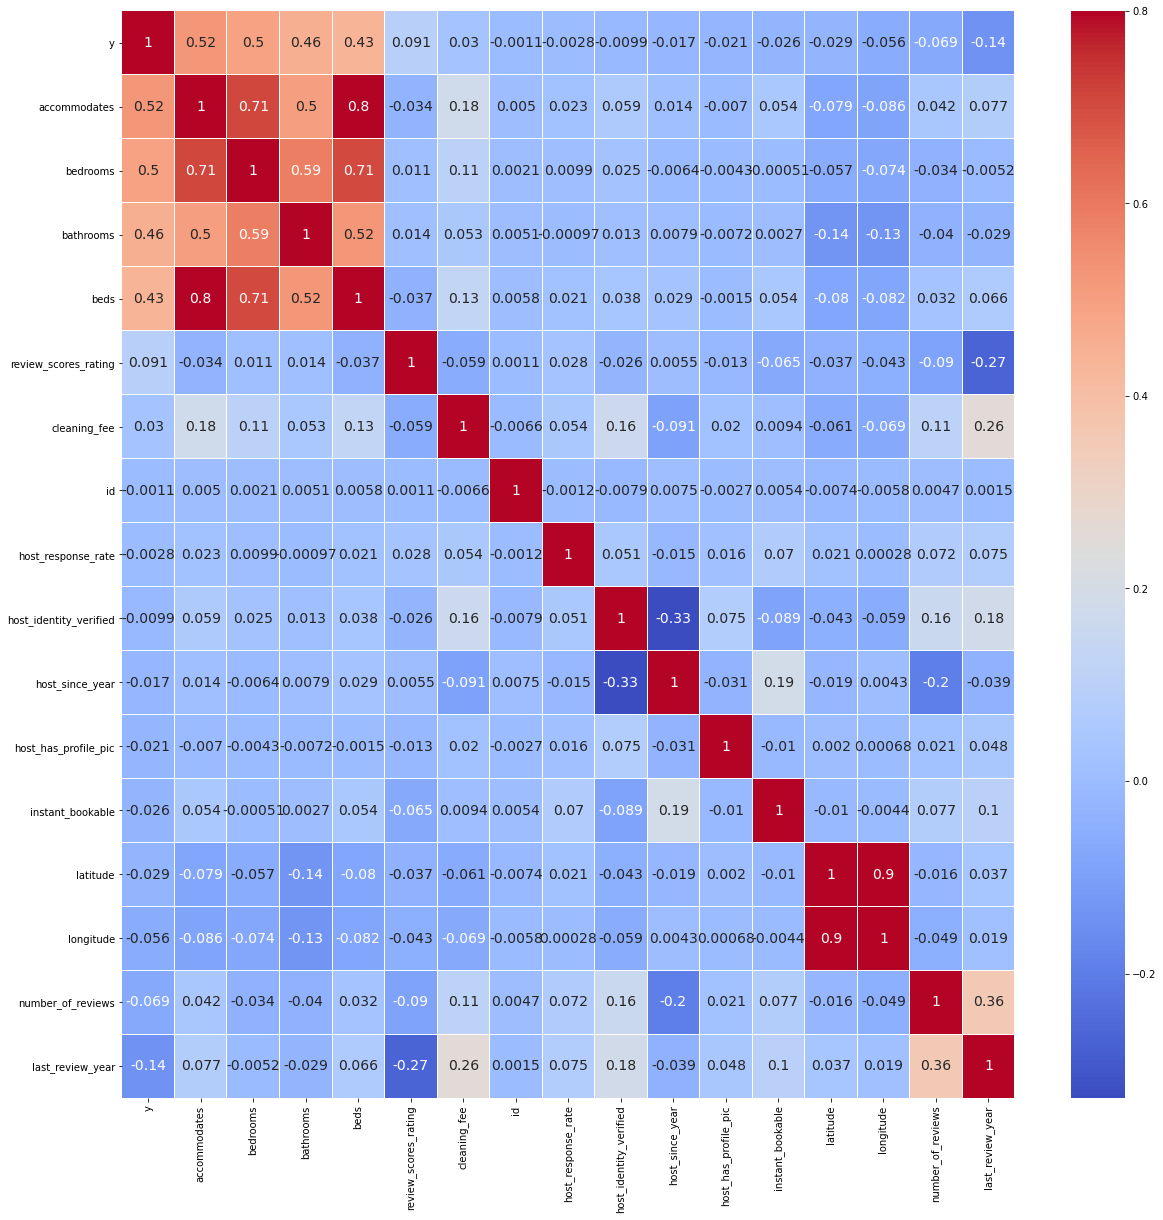

In [100]:
cols = train_dataset.corr().nlargest(20, 'y')['y'].index
cm = np.corrcoef(train_dataset[cols].values.T)

plt.subplots(figsize = (20,20))
sns.heatmap(cm, vmax=.8, linewidths=0.01, annot=True, cmap='coolwarm',
            xticklabels=cols.values, yticklabels=cols.values, annot_kws={'size':14});

host_response_rateはかなり相関低いしカテゴリ変数ではないので今回は削る。  
また、緯度軽度も相関が低い＋cityがあるので削る。  
次点でnumber_of_reviews, review_scores_ratingの二つもいらなそうかな

In [101]:
full_dataset.drop('host_response_rate', axis=1, inplace=True)

In [102]:
full_dataset.drop('latitude', axis=1, inplace=True)
full_dataset.drop('longitude', axis=1, inplace=True)

# データの確認

## accommodates

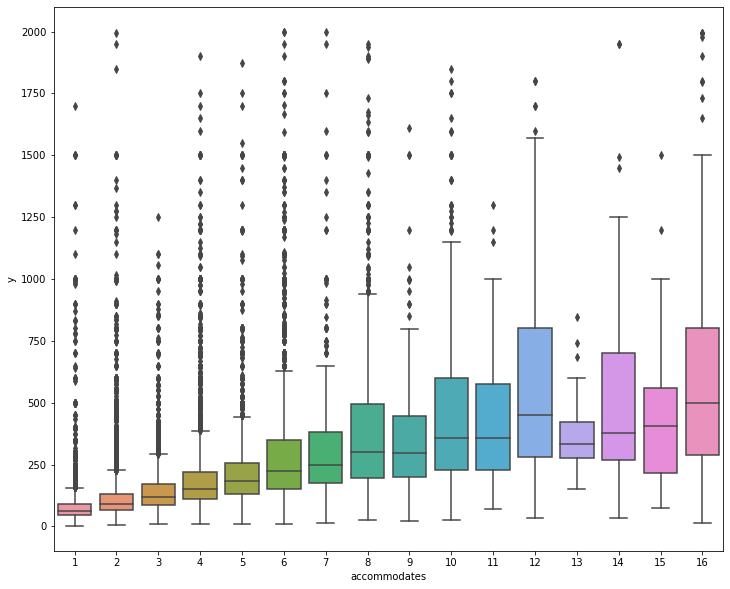

In [103]:
plt.subplots(figsize = (12,10))
sns.boxplot(x='accommodates', y='y', data=train_dataset)
plt.show();

In [104]:
full_dataset['accommodates'] = full_dataset['accommodates'].astype('float64')

## amenities

In [105]:
# 文字列の{,},"を削除、書き方はこういう書き方指定らしい
full_dataset['amenities'] = full_dataset['amenities'].str.replace(r'{|}|"', "", regex=True)
# 指定文字で分割し、get_dummiesを行う。
amenities = full_dataset['amenities'].str.get_dummies(',')

In [106]:
amenities.shape

(74111, 130)

In [107]:
full_dataset.shape

(74111, 25)

In [108]:
full_dataset = pd.concat([full_dataset, amenities], axis=1)
full_dataset.shape

(74111, 155)

In [109]:
full_dataset = full_dataset.drop('amenities', axis=1)

## bathrooms

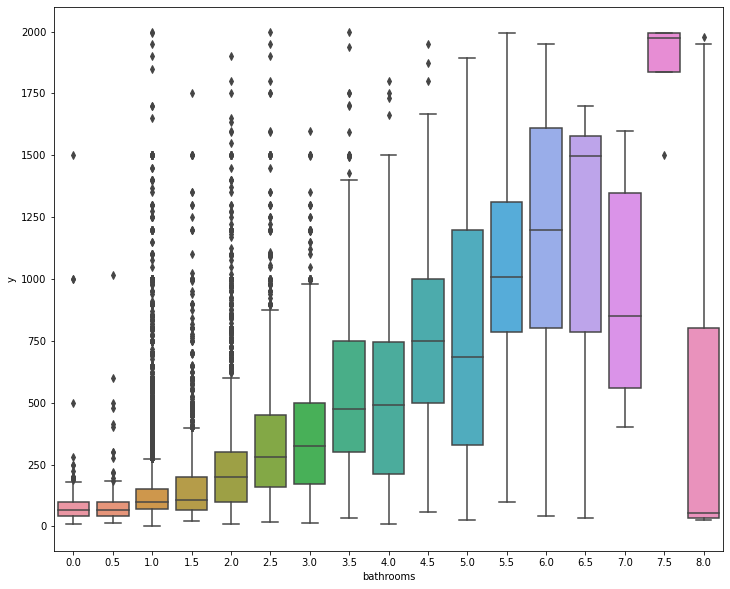

In [110]:
plt.subplots(figsize = (12,10))
sns.boxplot(x='bathrooms', y='y', data=train_dataset)
plt.show();

## bed_type

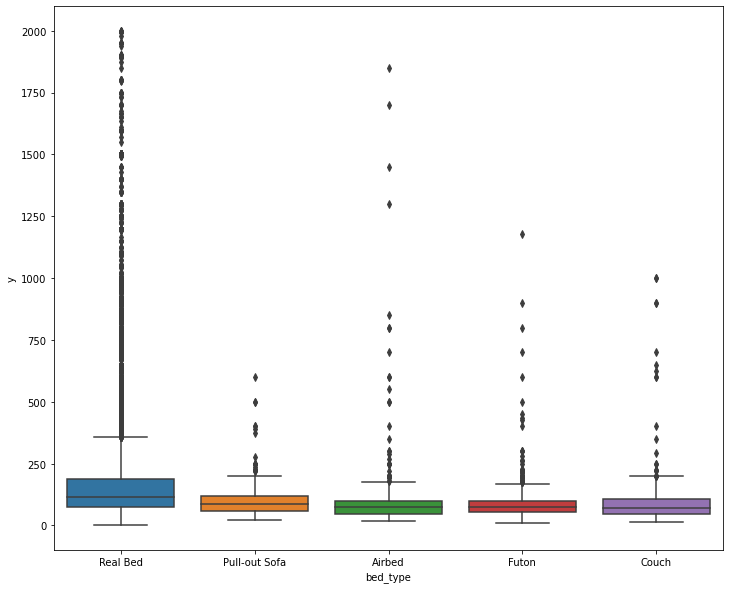

In [111]:
plt.subplots(figsize = (12,10))
sns.boxplot(x='bed_type', y='y', data=train_dataset)
plt.show();

In [112]:
bed_type = pd.get_dummies(full_dataset['bed_type'])
bed_type

,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
18523,0,0,0,0,1
18524,0,0,0,0,1
18525,0,0,0,0,1
18526,0,0,0,0,1


In [113]:
full_dataset.shape

(74111, 154)

In [114]:
full_dataset = pd.concat([full_dataset, bed_type], axis=1)
full_dataset.shape

(74111, 159)

In [115]:
full_dataset = full_dataset.drop('bed_type', axis=1)

In [116]:
full_dataset.shape

(74111, 158)

## bedrooms

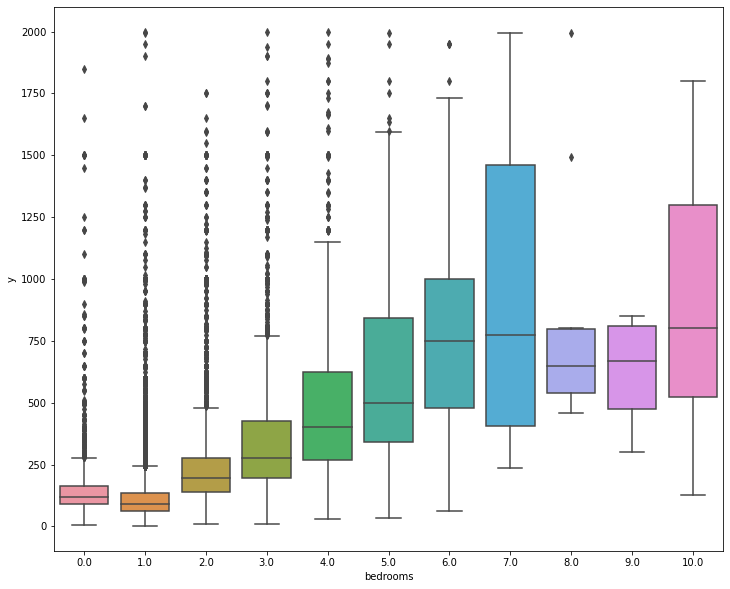

In [117]:
plt.subplots(figsize = (12,10))
sns.boxplot(x='bedrooms', y='y', data=train_dataset)
plt.show();

## beds

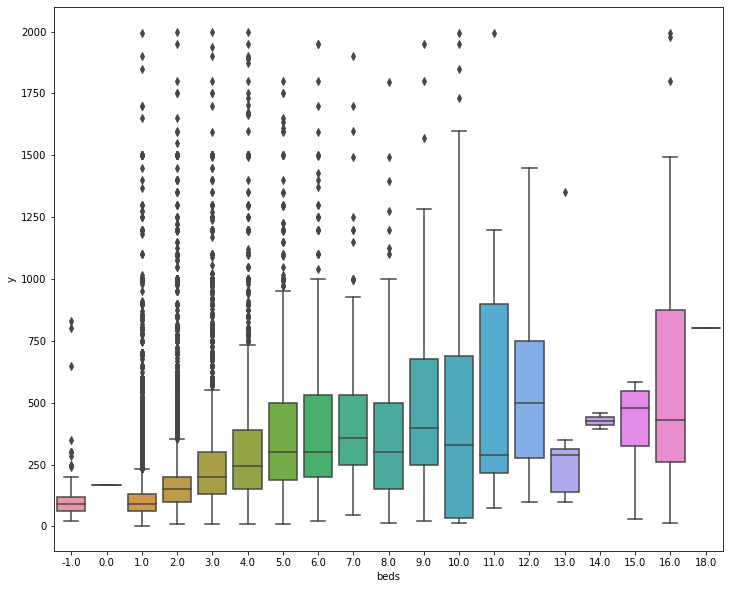

In [118]:
plt.subplots(figsize = (12,10))
sns.boxplot(x='beds', y='y', data=train_dataset)
plt.show();

## cancellation_policy

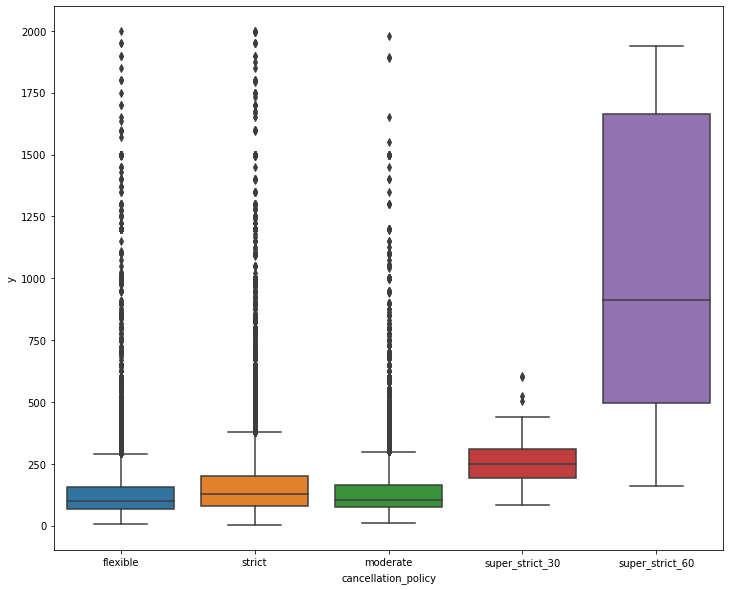

In [119]:
plt.subplots(figsize = (12,10))
sns.boxplot(x='cancellation_policy', y='y', data=train_dataset)
plt.show();

In [120]:
cancellation_policy = pd.get_dummies(full_dataset['cancellation_policy'])
full_dataset = pd.concat([full_dataset, cancellation_policy], axis=1)
full_dataset.shape

(74111, 163)

In [121]:
full_dataset = full_dataset.drop('cancellation_policy', axis=1)
full_dataset.shape

(74111, 162)

## city

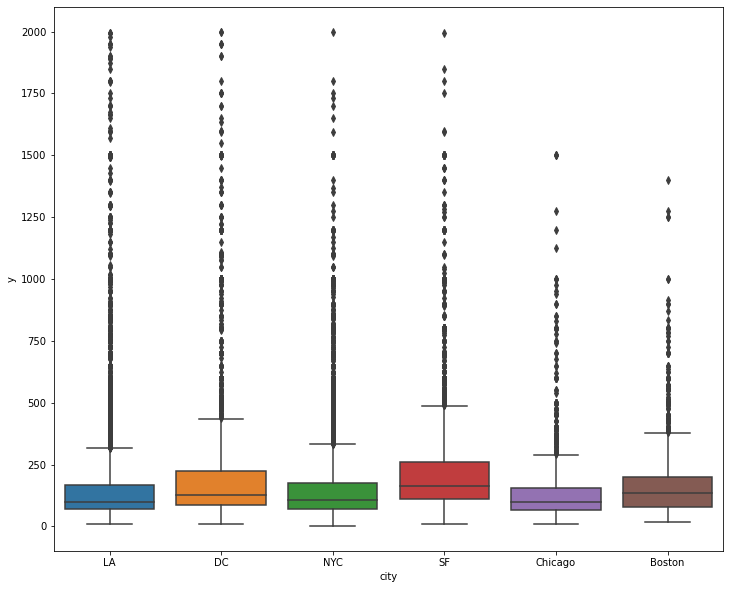

In [122]:
plt.subplots(figsize = (12,10))
sns.boxplot(x='city', y='y', data=train_dataset)
plt.show();

In [123]:
city = pd.get_dummies(full_dataset['city'])
full_dataset = pd.concat([full_dataset, city], axis=1)
full_dataset.shape

(74111, 168)

In [124]:
full_dataset = full_dataset.drop('city', axis=1)
full_dataset.shape

(74111, 167)

## cleaning_fee

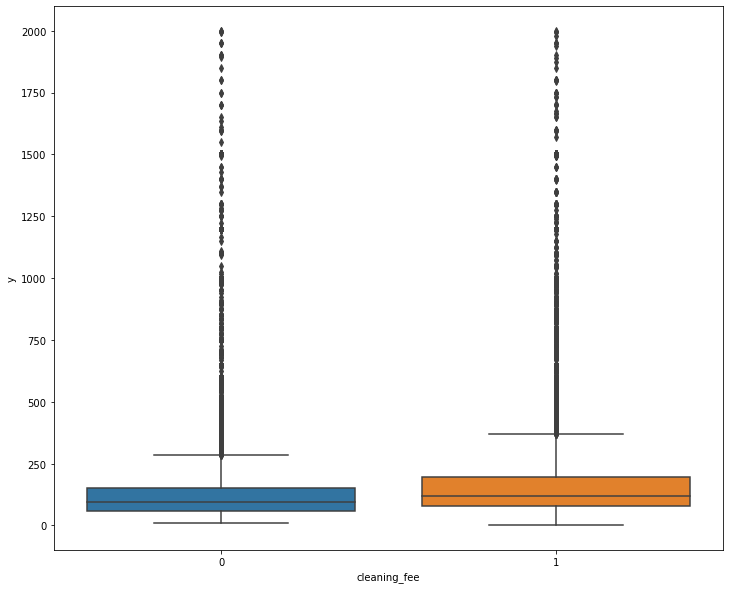

In [125]:
plt.subplots(figsize = (12,10))
sns.boxplot(x='cleaning_fee', y='y', data=train_dataset)
plt.show();

In [126]:
full_dataset['cleaning_fee']

0        1
1        1
2        1
3        1
4        1
        ..
18523    1
18524    0
18525    1
18526    1
18527    0
Name: cleaning_fee, Length: 74111, dtype: int64

## description

物件の説明がされている。  
inとかでキーワード抜き出しても面白そう

----- family -----
4284 / 55583
median: 139 ->(not) 110
mean: 203 ->(not) 156
----- food -----
3985 / 55583
median: 99 ->(not) 115
mean: 133 ->(not) 162
----- station -----
5550 / 55583
median: 98 ->(not) 115
mean: 133 ->(not) 163
----- private -----
15935 / 55583
median: 99 ->(not) 119
mean: 144 ->(not) 166
----- love -----
11279 / 55583
median: 102 ->(not) 115
mean: 147 ->(not) 163
----- clean -----
9204 / 55583
median: 99 ->(not) 119
mean: 128 ->(not) 166
----- Big -----
991 / 55583
median: 99 ->(not) 111
mean: 152 ->(not) 160
----- new -----
10624 / 55583
median: 125 ->(not) 110
mean: 166 ->(not) 158
----- garden -----
4034 / 55583
median: 129 ->(not) 110
mean: 180 ->(not) 158
----- cozy -----
6463 / 55583
median: 100 ->(not) 115
mean: 134 ->(not) 163
----- quality -----
831 / 55583
median: 139 ->(not) 110
mean: 187 ->(not) 159
----- kids -----
2384 / 55583
median: 160 ->(not) 110
mean: 221 ->(not) 157


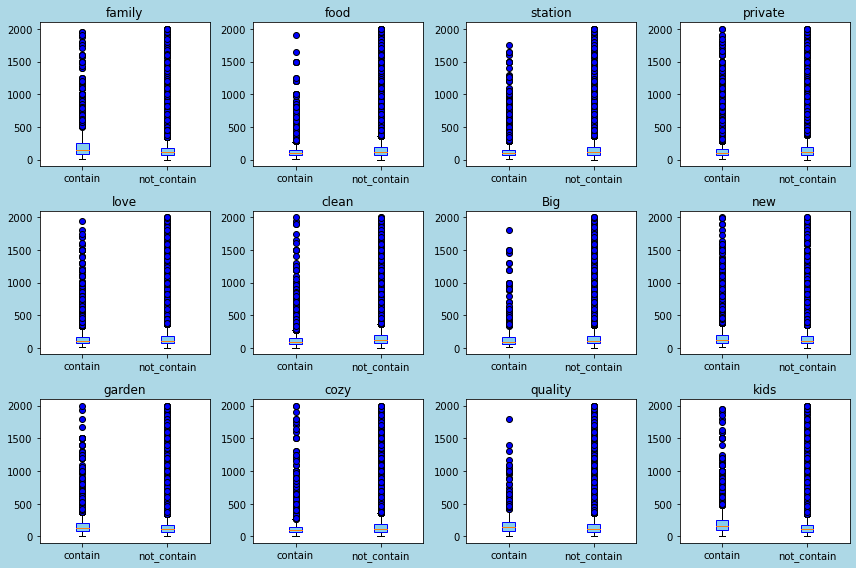

In [127]:
descriptions = ['family', 'food', 'station', 'private', 'love', 'clean',
                'Big', 'new', 'garden', 'cozy', 'quality', 'kids']
fig = plt.figure(figsize=(12, 8), facecolor='lightblue', tight_layout=True)

for i, description in enumerate(descriptions):
    contain = train_dataset[train_dataset['description'].str.contains(description)]['y']
    not_contain = train_dataset[~train_dataset['description'].str.contains(description)]['y']
    print('-----', description, '-----')
    print(contain.shape[0], '/', train_dataset.shape[0])

    ax = fig.add_subplot(3, 4, i+1, title=description)
    ax.boxplot([contain, not_contain], labels=['contain', 'not_contain'], 
               patch_artist=True, flierprops=dict(markerfacecolor='blue'),
               boxprops=dict(facecolor='skyblue', color='blue'))
    print('median:', int(contain.describe()['50%']), '->(not)', int(not_contain.describe()['50%']))
    print('mean:', int(contain.describe()['mean']), '->(not)', int(not_contain.describe()['mean']))

In [128]:
for i, description in enumerate(descriptions):
    new_col = 'description_' + description
    full_dataset[new_col] = full_dataset['description'].str.contains(description)
    full_dataset[new_col] = full_dataset[new_col].apply(lambda x: 1 if x else 0)
    train_dataset[new_col] = train_dataset['description'].str.contains(description)
    train_dataset[new_col] = train_dataset[new_col].apply(lambda x: 1 if x else 0)

In [129]:
full_dataset = full_dataset.drop('description', axis=1)
full_dataset.shape

(74111, 178)

## first_review

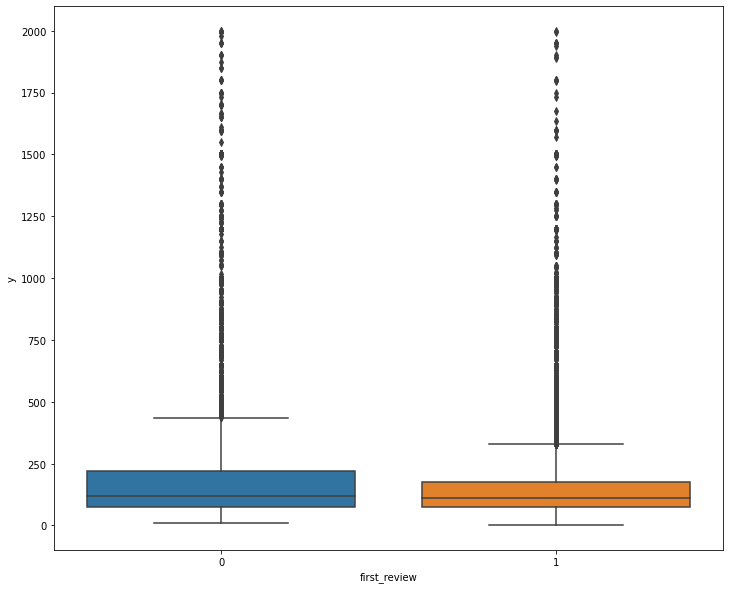

In [130]:
plt.subplots(figsize = (12,10))
sns.boxplot(x='first_review', y='y', data=train_dataset)
plt.show();

## host_has_profile_pic

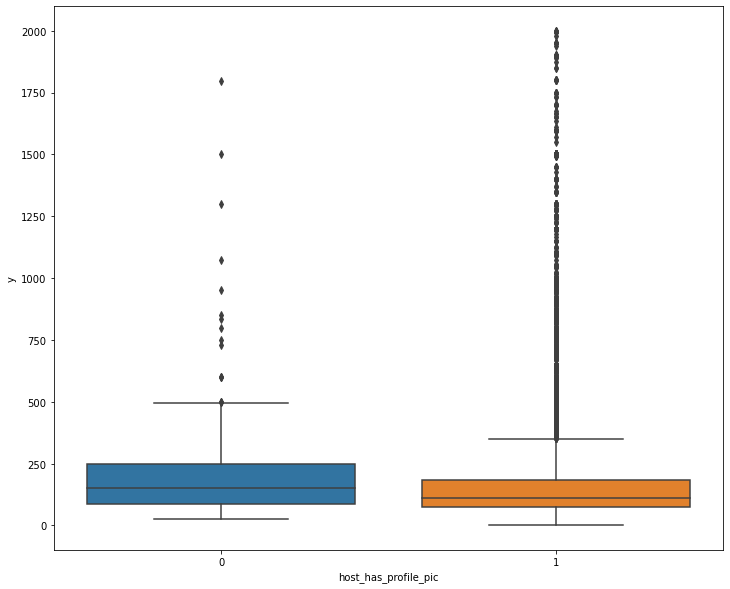

In [131]:
plt.subplots(figsize = (12,10))
sns.boxplot(x='host_has_profile_pic', y='y', data=train_dataset)
plt.show();

## host_identity_verified

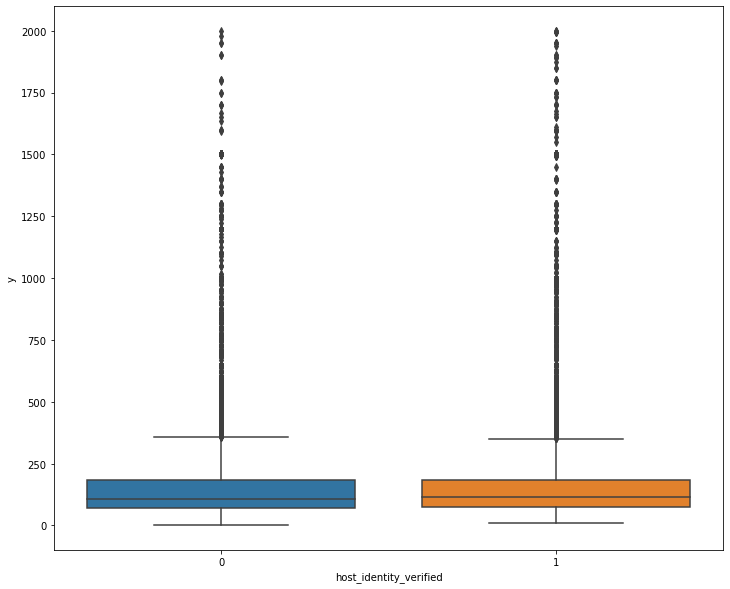

In [132]:
plt.subplots(figsize = (12,10))
sns.boxplot(x='host_identity_verified', y='y', data=train_dataset)
plt.show();

## (host_response_rate)

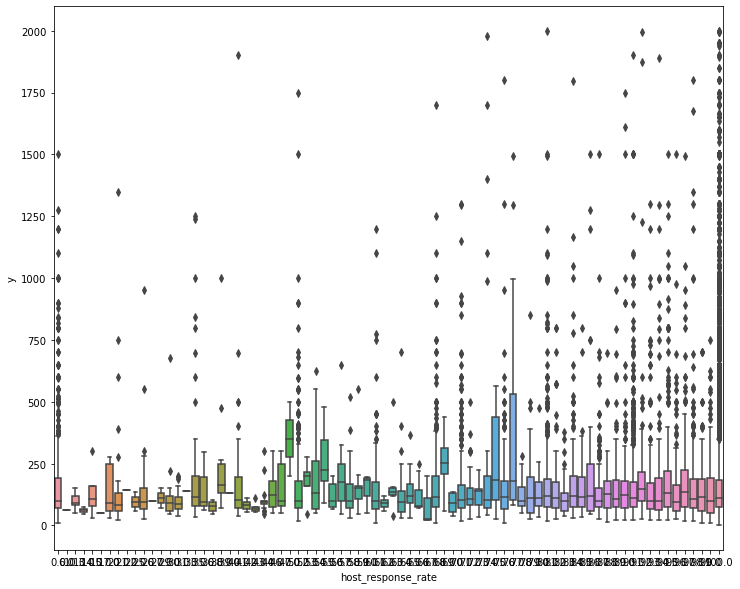

In [133]:
plt.subplots(figsize = (12,10))
sns.boxplot(x='host_response_rate', y='y', data=train_dataset)
plt.show();

## host_since(host_since_year)

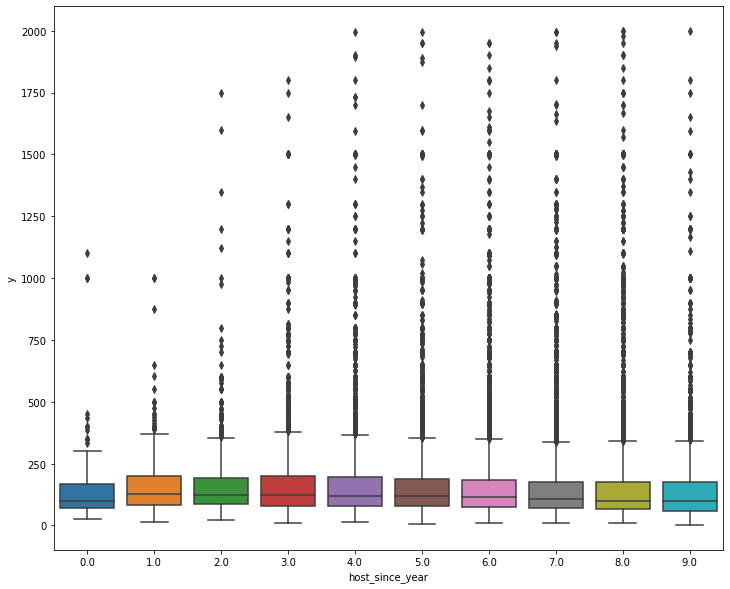

In [134]:
plt.subplots(figsize = (12,10))
sns.boxplot(x='host_since_year', y='y', data=train_dataset)
plt.show();

## instant_bookable

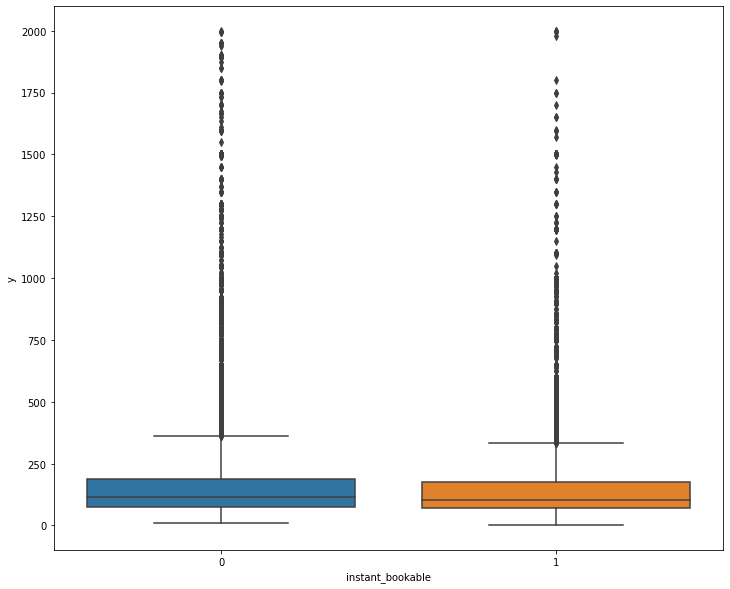

In [135]:
plt.subplots(figsize = (12,10))
sns.boxplot(x='instant_bookable', y='y', data=train_dataset)
plt.show();

## last_review(last_review_year)

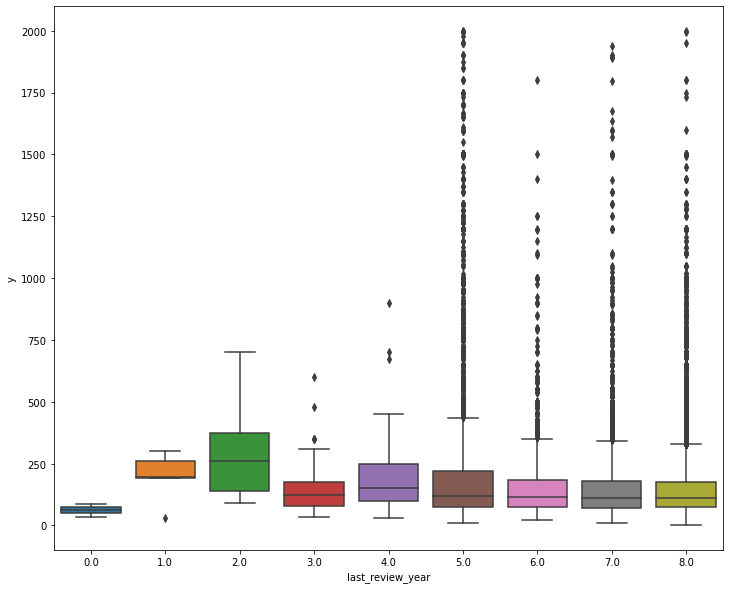

In [136]:
plt.subplots(figsize = (12,10))
sns.boxplot(x='last_review_year', y='y', data=train_dataset)
plt.show();

## name

----- Penthouse -----
407 / 55583
median: 220 ->(not) 110
mean: 284 ->(not) 159
----- Guest -----
730 / 55583
median: 99 ->(not) 111
mean: 122 ->(not) 160
----- Cozy -----
4013 / 55583
median: 88 ->(not) 115
mean: 108 ->(not) 164
----- Modern -----
2014 / 55583
median: 149 ->(not) 110
mean: 209 ->(not) 158
----- Classic -----
216 / 55583
median: 149 ->(not) 110
mean: 197 ->(not) 160
----- Luxury -----
1636 / 55583
median: 179 ->(not) 110
mean: 242 ->(not) 157
----- Artist -----
474 / 55583
median: 105 ->(not) 110
mean: 145 ->(not) 160
----- Private -----
5840 / 55583
median: 79 ->(not) 119
mean: 105 ->(not) 166
----- Ocean -----
360 / 55583
median: 184 ->(not) 110
mean: 294 ->(not) 159
----- Great -----
1046 / 55583
median: 100 ->(not) 111
mean: 145 ->(not) 160
----- garden -----
259 / 55583
median: 149 ->(not) 110
mean: 183 ->(not) 160
----- pool -----
152 / 55583
median: 148 ->(not) 110
mean: 264 ->(not) 159


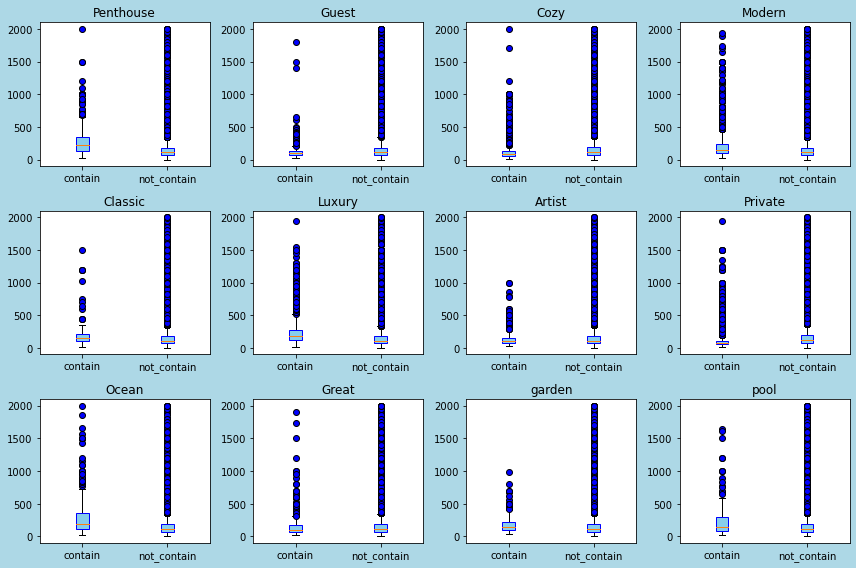

In [137]:
# 可視化
names = ['Penthouse', 'Guest', 'Cozy', 'Modern', 'Classic', 'Luxury',
         'Artist', 'Private', 'Ocean', 'Great', 'garden', 'pool']
fig = plt.figure(figsize=(12, 8), facecolor='lightblue', tight_layout=True)

for i, name in enumerate(names):
    contain = train_dataset[train_dataset['name'].str.contains(name)]['y']
    not_contain = train_dataset[~train_dataset['name'].str.contains(name)]['y']
    print('-----', name, '-----')
    print(contain.shape[0], '/', train_dataset.shape[0])

    ax = fig.add_subplot(3, 4, i+1, title=name)
    ax.boxplot([contain, not_contain], labels=['contain', 'not_contain'], 
               patch_artist=True, flierprops=dict(markerfacecolor='blue'),
               boxprops=dict(facecolor='skyblue', color='blue'))
    print('median:', int(contain.describe()['50%']), '->(not)', int(not_contain.describe()['50%']))
    print('mean:', int(contain.describe()['mean']), '->(not)', int(not_contain.describe()['mean']))

In [138]:
for i, name in enumerate(names):
    new_col = 'name_' + name
    full_dataset[new_col] = full_dataset['name'].str.contains(name)
    full_dataset[new_col] = full_dataset[new_col].apply(lambda x: 1 if x else 0)
    train_dataset[new_col] = train_dataset['name'].str.contains(name)
    train_dataset[new_col] = train_dataset[new_col].apply(lambda x: 1 if x else 0)

In [139]:
full_dataset = full_dataset.drop('name', axis=1)
full_dataset.shape

(74111, 189)

## neighbourhood　☆

In [140]:
full_dataset['neighbourhood'].value_counts().sort_values(ascending=False)

None                        6872
Williamsburg                2862
Bedford-Stuyvesant          2166
Bushwick                    1601
Upper West Side             1396
                            ... 
Pullman                        1
Suitland-Silver Hill, MD       1
Magnificent Mile               1
Todt Hill                      1
Vernon                         1
Name: neighbourhood, Length: 620, dtype: int64

In [141]:
neighbourhood = pd.get_dummies(full_dataset['neighbourhood'])
full_dataset = pd.concat([full_dataset, neighbourhood], axis=1)
full_dataset.shape

(74111, 809)

In [142]:
full_dataset.drop('neighbourhood', axis=1, inplace=True)

欠損値の処理ができていない...  
Noneと列落としの両方試したい。

## number_of_reviews

<AxesSubplot:>

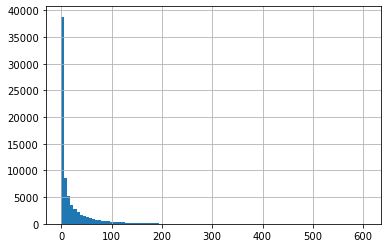

In [143]:
full_dataset['number_of_reviews'].hist(bins=100)

In [144]:
full_dataset['number_of_reviews'].describe()

count    74111.000000
mean        20.900568
std         37.828641
min          0.000000
25%          1.000000
50%          6.000000
75%         23.000000
max        605.000000
Name: number_of_reviews, dtype: float64

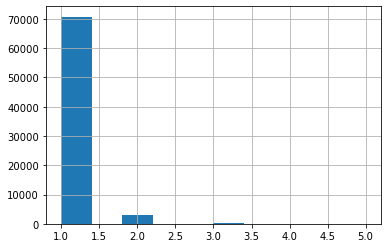

In [145]:
# 100単位て分別、-1にしているのは0の値を含みたいため
full_dataset['number_of_reviews_cut/100'] = pd.cut(full_dataset['number_of_reviews'], bins=[-1, 100, 200, 300, 400, np.inf], labels=[1, 2, 3, 4, 5])
full_dataset['number_of_reviews_cut/100'].hist();

In [146]:
full_dataset.drop('number_of_reviews', axis=1, inplace=True)
full_dataset.shape

(74111, 808)

## property_type

In [147]:
full_dataset['property_type'].value_counts().sort_values(ascending=False)

Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Train                     2
Cave                      2
Casa particular           1
Lighthouse                1
Island                    1
Parking Space             1
Name: property_type,

In [148]:
property_type = pd.get_dummies(full_dataset['property_type'])
full_dataset = pd.concat([full_dataset, property_type], axis=1)
full_dataset.shape

(74111, 843)

In [149]:
full_dataset.drop('property_type', axis=1, inplace=True)
full_dataset.shape

(74111, 842)

## review_scores_rating

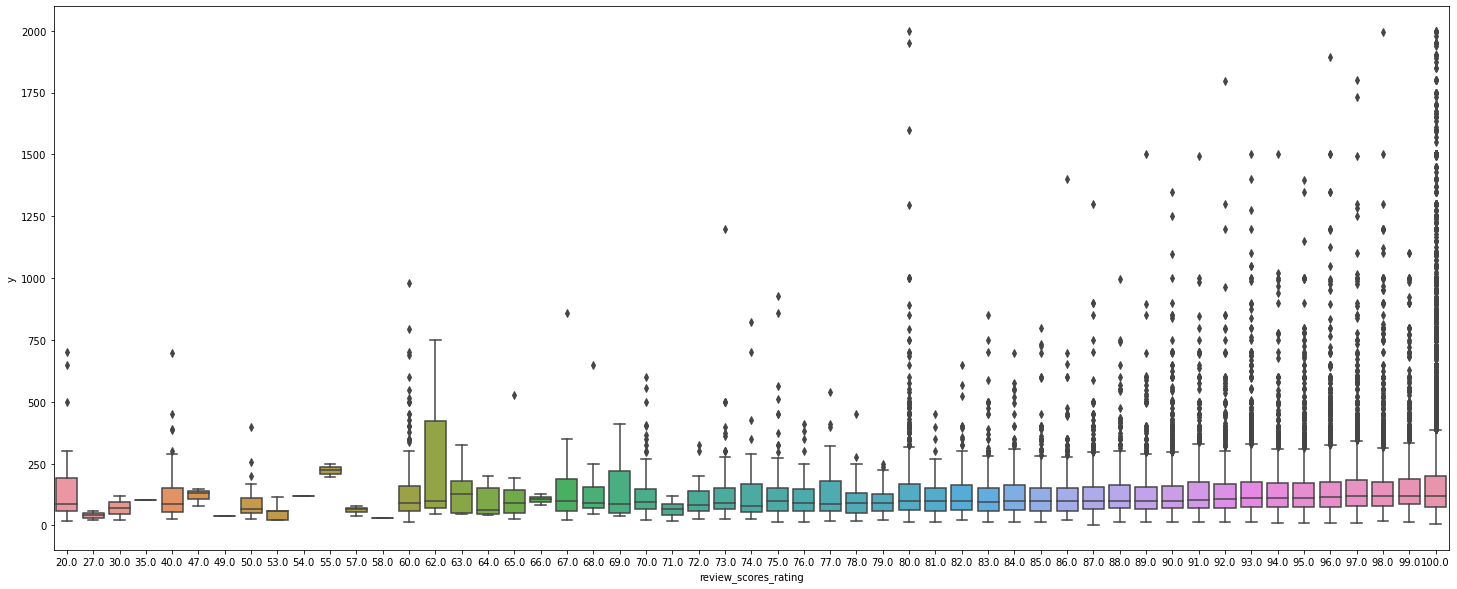

In [150]:
plt.subplots(figsize = (25,10))
sns.boxplot(x='review_scores_rating', y='y', data=train_dataset)
plt.show();

## room_type

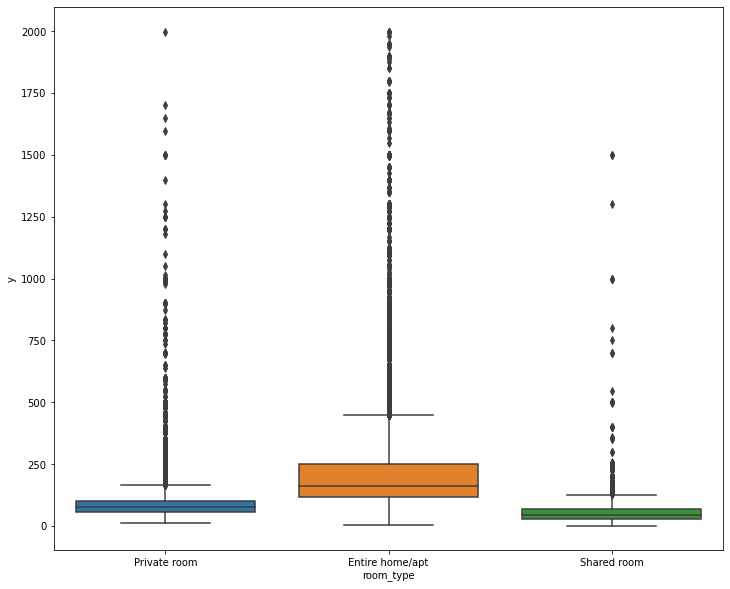

In [151]:
plt.subplots(figsize = (12,10))
sns.boxplot(x='room_type', y='y', data=train_dataset)
plt.show();

In [152]:
room_type = pd.get_dummies(full_dataset['room_type'])
full_dataset = pd.concat([full_dataset, room_type], axis=1)
full_dataset.shape

(74111, 845)

In [153]:
full_dataset.drop('room_type', axis=1, inplace=True)
full_dataset.shape

(74111, 844)

## thumbnail_url

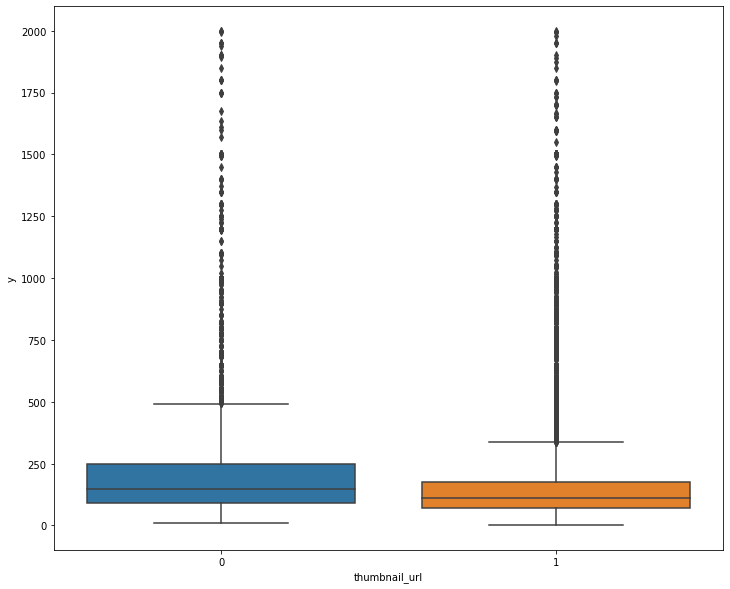

In [154]:
plt.subplots(figsize = (12,10))
sns.boxplot(x='thumbnail_url', y='y', data=train_dataset)
plt.show();

## zipcode

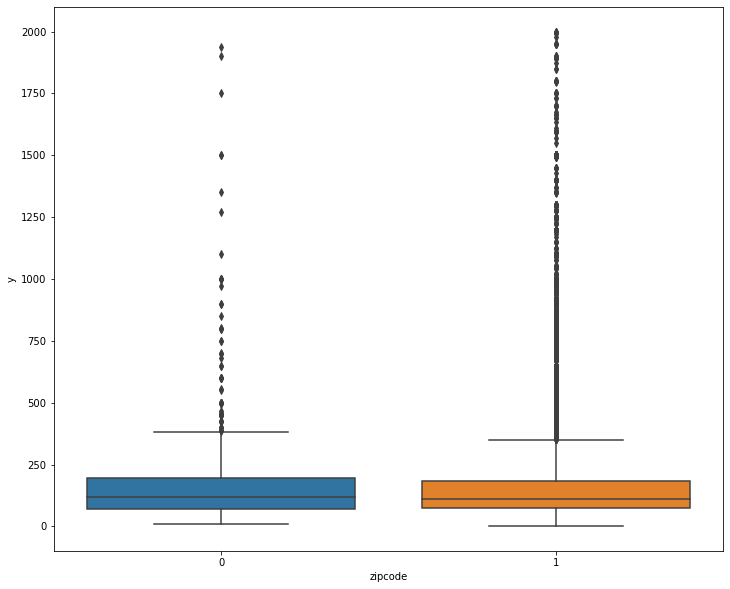

In [155]:
plt.subplots(figsize = (12,10))
sns.boxplot(x='zipcode', y='y', data=train_dataset)
plt.show();

# 確認

In [156]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74111 entries, 0 to 18527
Columns: 844 entries, accommodates to Shared room
dtypes: bool(1), category(1), float64(7), int64(158), object(3), uint8(674)
memory usage: 143.3+ MB


In [157]:
full_dataset.select_dtypes(include=object)

,first_review,thumbnail_url,zipcode
0,1,0,1
1,1,1,1
2,1,1,0
3,1,0,1
4,1,1,1
...,...,...,...
18523,0,1,1
18524,1,0,1
18525,0,1,1
18526,1,1,1


In [158]:
quality = ['first_review', 'thumbnail_url', 'zipcode']
full_dataset[quality] = full_dataset[quality].astype(int)

In [159]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74111 entries, 0 to 18527
Columns: 844 entries, accommodates to Shared room
dtypes: bool(1), category(1), float64(7), int64(161), uint8(674)
memory usage: 143.3 MB


In [160]:
full_dataset.select_dtypes(include='category')

,number_of_reviews_cut/100
0,1
1,1
2,1
3,1
4,1
...,...
18523,1
18524,1
18525,1
18526,1


In [161]:
full_dataset['number_of_reviews_cut/100'] = full_dataset['number_of_reviews_cut/100'].astype('float64')

In [162]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74111 entries, 0 to 18527
Columns: 844 entries, accommodates to Shared room
dtypes: bool(1), float64(8), int64(161), uint8(674)
memory usage: 143.8 MB


# ダミー変数化

floatにしているのはカテゴリ変数にしていないものが残っている。  
review_scores_rating以外はカテゴリ変数にする。  
review_scores_ratingもカテゴリ化してしまっても良いが今回は残す。  
1.0で表していない数なのでstrで保存する。  
ダミー変数にして1.0にしてもいいが、する必要はないと思われる。

In [163]:
full_dataset.select_dtypes(include='float64')

,accommodates,bathrooms,bedrooms,beds,review_scores_rating,host_since_year,last_review_year,number_of_reviews_cut/100
0,6.0,2.0,1.0,4.0,60.0,8.0,7.0,1.0
1,2.0,1.0,1.0,1.0,100.0,7.0,8.0,1.0
2,2.0,2.0,1.0,1.0,83.0,8.0,8.0,1.0
3,2.0,1.0,1.0,1.0,95.0,4.0,8.0,1.0
4,2.0,1.0,1.0,1.0,100.0,7.0,8.0,1.0
...,...,...,...,...,...,...,...,...
18523,4.0,1.0,2.0,2.0,100.0,1.0,5.0,1.0
18524,2.0,1.0,2.0,1.0,90.0,9.0,8.0,1.0
18525,5.0,1.5,2.0,2.0,100.0,6.0,5.0,1.0
18526,2.0,1.0,1.0,2.0,95.0,6.0,8.0,1.0


In [164]:
full_dataset.shape

(74111, 844)

In [165]:
quality = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'host_since_year','last_review_year', 'number_of_reviews_cut/100']
full_dataset[quality] = full_dataset[quality].astype(str)

In [166]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74111 entries, 0 to 18527
Columns: 844 entries, accommodates to Shared room
dtypes: bool(1), float64(1), int64(161), object(7), uint8(674)
memory usage: 143.8+ MB


# 標準化

In [167]:
full_dataset.select_dtypes(include='float64')

,review_scores_rating
0,60.0
1,100.0
2,83.0
3,95.0
4,100.0
...,...
18523,100.0
18524,90.0
18525,100.0
18526,95.0


In [168]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(full_dataset[['review_scores_rating']])
full_dataset[['review_scores_rating']] = scaler.transform(full_dataset[['review_scores_rating']])

<AxesSubplot:>

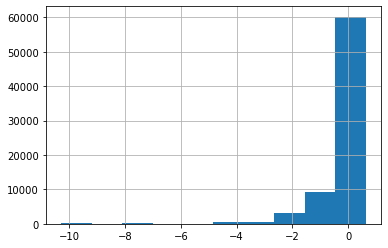

In [169]:
full_dataset['review_scores_rating'].hist()

In [170]:
full_dataset.head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,first_review,host_has_profile_pic,host_identity_verified,instant_bookable,review_scores_rating,thumbnail_url,zipcode,training_set,host_since_year,last_review_year,smooth pathway to front door,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,...,Earth House,Guest suite,Guesthouse,Hostel,House,Hut,In-law,Island,Lighthouse,Loft,Other,Parking Space,Serviced apartment,Tent,Timeshare,Tipi,Townhouse,Train,Treehouse,Vacation home,Villa,Yurt,Entire home/apt,Private room,Shared room
0,6.0,2.0,1.0,4.0,1,1,1,0,0,-4.831411,0,1,True,8.0,7.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2.0,1.0,1.0,1.0,1,1,1,1,0,0.626890,1,1,True,7.0,8.0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2.0,2.0,1.0,1.0,1,1,1,0,1,-1.692888,1,0,True,8.0,8.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2.0,1.0,1.0,1.0,1,1,1,1,1,-0.055398,0,1,True,4.0,8.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2.0,1.0,1.0,1.0,1,1,1,1,0,0.626890,1,1,True,7.0,8.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# 出力

In [171]:
train_data = full_dataset[full_dataset['training_set']==1.0]
test_data = full_dataset[full_dataset['training_set']==0.0]

In [172]:
train_data = pd.concat([train_id, train_data], axis=1)
train_data.drop('training_set', axis=1, inplace=True)
train_data = pd.concat([train_data, target], axis=1)
train_data.shape

(55583, 845)

In [173]:
test_data = pd.concat([test_id, test_data], axis=1)
test_data.drop('training_set', axis=1, inplace=True)
test_data.shape

(18528, 844)

In [176]:
train_data.head()

,id,accommodates,bathrooms,bedrooms,beds,cleaning_fee,first_review,host_has_profile_pic,host_identity_verified,instant_bookable,review_scores_rating,thumbnail_url,zipcode,host_since_year,last_review_year,smooth pathway to front door,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,...,Guest suite,Guesthouse,Hostel,House,Hut,In-law,Island,Lighthouse,Loft,Other,Parking Space,Serviced apartment,Tent,Timeshare,Tipi,Townhouse,Train,Treehouse,Vacation home,Villa,Yurt,Entire home/apt,Private room,Shared room,y
0,0,6.0,2.0,1.0,4.0,1,1,1,0,0,-4.831411,0,1,8.0,7.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,138.0
1,1,2.0,1.0,1.0,1.0,1,1,1,1,0,0.626890,1,1,7.0,8.0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,42.0
2,2,2.0,2.0,1.0,1.0,1,1,1,0,1,-1.692888,1,0,8.0,8.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,65.0
3,3,2.0,1.0,1.0,1.0,1,1,1,1,1,-0.055398,0,1,4.0,8.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,166.0
4,4,2.0,1.0,1.0,1.0,1,1,1,1,0,0.626890,1,1,7.0,8.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,165.0


In [ ]:
train_data.to_csv('train_cleaning version1 matsu.csv', index=False)
test_data.to_csv('test_cleaning version1 matsu.csv', index=False)